In [2]:
## remember to run conn_cocolab from the terminal before running cells in this notebook!
from __future__ import division
import os
import urllib, cStringIO

import pymongo as pm
from PIL import Image
import base64

import numpy as np
from numpy import *
import os
import PIL
from PIL import Image
import base64
import matplotlib
from matplotlib import pylab, mlab, pyplot
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')
from matplotlib.path import Path
import matplotlib.patches as patches


import cStringIO
import pandas as pd
import pymongo as pm ## first establish ssh tunnel to server where database is running
from matplotlib.path import Path
import matplotlib.patches as patches
from svgpathtools import parse_path

In [3]:
# directory & file hierarchy
exp_path = 'museumdraw'
analysis_dir = os.getcwd()
exp_dir = os.path.abspath(os.path.join(os.getcwd(),'../..','experiments'))
##
sketch_dir = os.path.join(analysis_dir,'sketches')
if not os.path.exists(sketch_dir):
    os.makedirs(sketch_dir)
## dir where we can keep all sketches not binned by category    


In [4]:
# set vars 
auth = pd.read_csv('auth.txt', header = None) # this auth.txt file contains the password for the sketchloop user
pswd = auth.values[0][0]
user = 'sketchloop'
host = 'rxdhawkins.me' ## cocolab ip address

# have to fix this to be able to analyze from local
import pymongo as pm
conn = pm.MongoClient('mongodb://sketchloop:' + pswd + '@127.0.0.1')
db = conn['kiddraw']
coll = db['E1c']
coll2 = db['E1d']

In [5]:
# wave 1 of data collection (16 classes)
experiment_name = 'E1c'
time_threshold = 1510252452134 ## this is the timepoint after which real data started getting collected
all_sessions = coll.distinct('sessionId') ## this returns ALL sessions in this collection. we will then filter on time_threshold
valid_sessions = coll.find({'time':{'$gt': time_threshold}}).distinct('sessionId')
practice_categories = ['circle','triangle']
print 'We currently have {} valid sessions from {}.'.format(len(valid_sessions), experiment_name)

# wave 2 of data collection (22 classes) 
experiment_name = 'E1d'
valid_sessions += coll2.find({'time':{'$gt': time_threshold}}).distinct('sessionId')
print 'We currently have {} valid sessions, including {}.'.format(len(valid_sessions), experiment_name)

We currently have 56 valid sessions from E1c.
We currently have 92 valid sessions, including E1d.


In [6]:
s = valid_sessions[0]

In [7]:
image_recs = coll.find({'$and': [{'time': {'$gt': time_threshold}}, {'sessionId':s}, {'dataType':'finalImage'}]}).sort('time')    

#### helper functions for svg rendering

In [9]:
def polyline_pathmaker(lines):
    x = []
    y = []

    codes = [Path.MOVETO] # start with moveto command always
    for i,l in enumerate(lines):
        for _i,_l in enumerate(l):
            x.append(_l[0])
            y.append(_l[1])
            if _i<len(l)-1:
                codes.append(Path.LINETO) # keep pen on page
            else:
                if i != len(lines)-1: # final vertex
                    codes.append(Path.MOVETO)
    verts = zip(x,y)            
    return verts, codes

def path_renderer(verts, codes):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    if len(verts)>0:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor='none', lw=2)
        ax.add_patch(patch)
        ax.set_xlim(0,500)
        ax.set_ylim(0,500) 
        ax.axis('off')
        plt.gca().invert_yaxis() # y values increase as you go down in image
        plt.show()
    else:
        ax.set_xlim(0,500)
        ax.set_ylim(0,500)        
        ax.axis('off')
        plt.show()
    plt.savefig()
    plt.close()
    
def flatten(x):
    return [val for sublist in x for val in sublist]

In [35]:
imsize=224
image_recs = coll.find({'$and': [{'time': {'$gt': time_threshold}}, {'sessionId':s}, {'dataType':'finalImage'}]}).sort('time')    
for imrec in image_recs:         
    if imrec['category'] not in practice_categories: ## don't save practice category trials
        stroke_recs = coll.find({'$and': [{'time': {'$gt': time_threshold}}, 
                                          {'sessionId':s}, 
                                          {'dataType':'stroke'},
                                          {'trialNum': imrec['trialNum']}]}).sort('time')   

In [36]:
## grab sample drawing's strokes and make a list of svg strings from it
trial_num = stroke_recs[0]['trialNum']
category = stroke_recs[0]['category']
session_id = stroke_recs[0]['sessionId']

svg_list = []
for single_stroke in stroke_recs:
    svg_string = single_stroke['svg']
    svg_list.append(svg_string)

In [37]:
## parse into x,y coordinates and output list of lists of coordinates
lines = []
Verts = []
Codes = []
for stroke_ind,stroke in enumerate(svg_list):
    x = []
    y = []
    parsed = parse_path(stroke)
    for i,p in enumerate(parsed):
        if i!=len(parsed)-1: # last line segment
            x.append(p.start.real)
            y.append(p.start.imag)    
        else:
            x.append(p.start.real)
            y.append(p.start.imag)     
            x.append(p.end.real)
            y.append(p.end.imag)
    lines.append(zip(x,y))
    verts, codes = polyline_pathmaker(lines)
    Verts.append(verts)
    Codes.append(codes)  

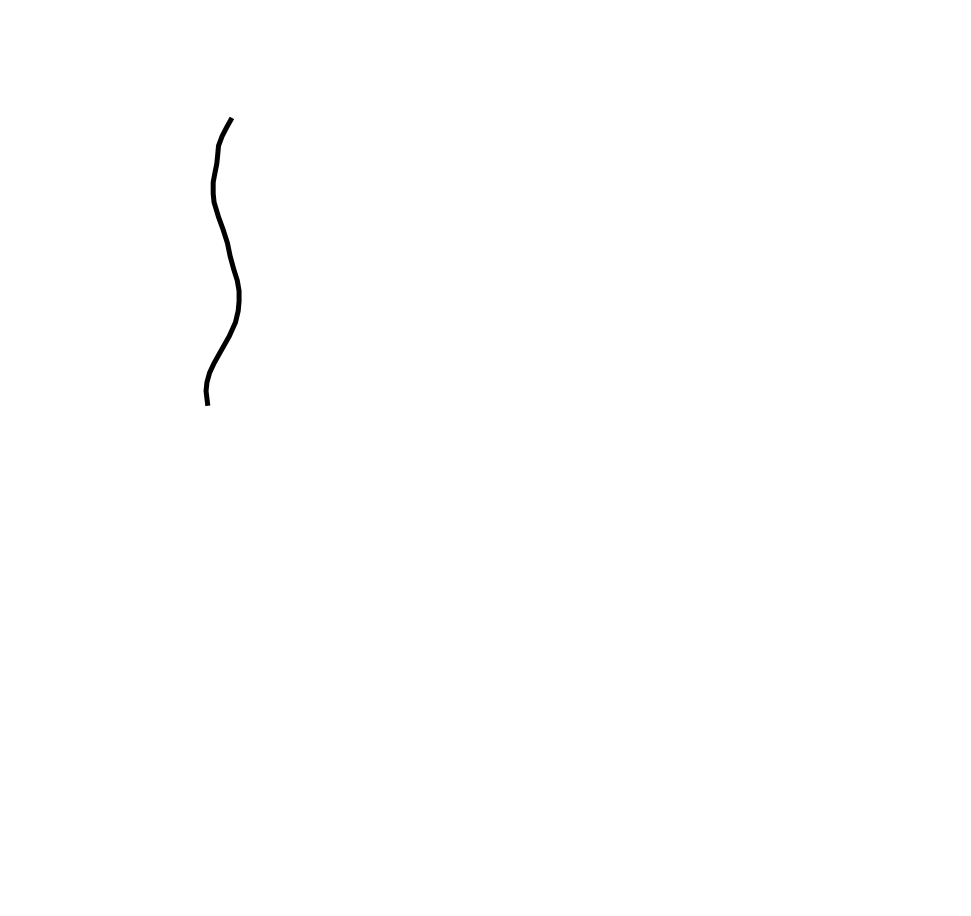

/Users/judithfan/kiddraw/analysis/museumdraw/python/cumulative_drawings/E1c_1510252568116/4_chair/4_chair_0.png


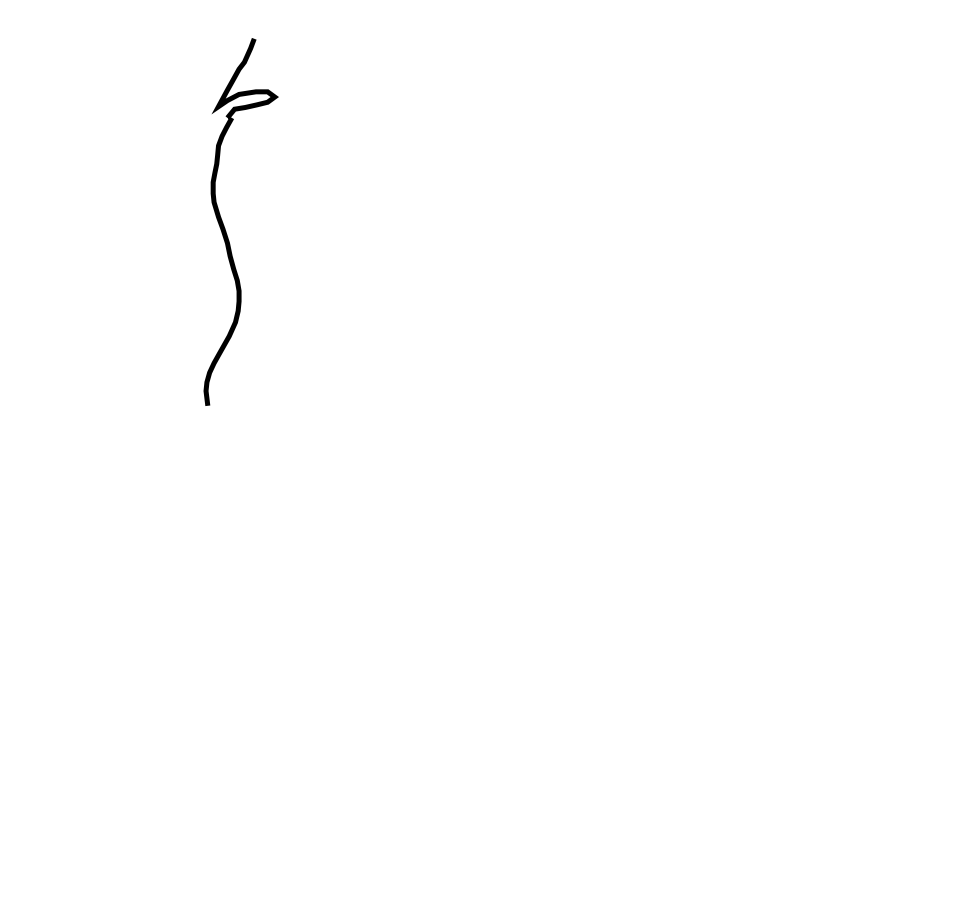

/Users/judithfan/kiddraw/analysis/museumdraw/python/cumulative_drawings/E1c_1510252568116/4_chair/4_chair_1.png


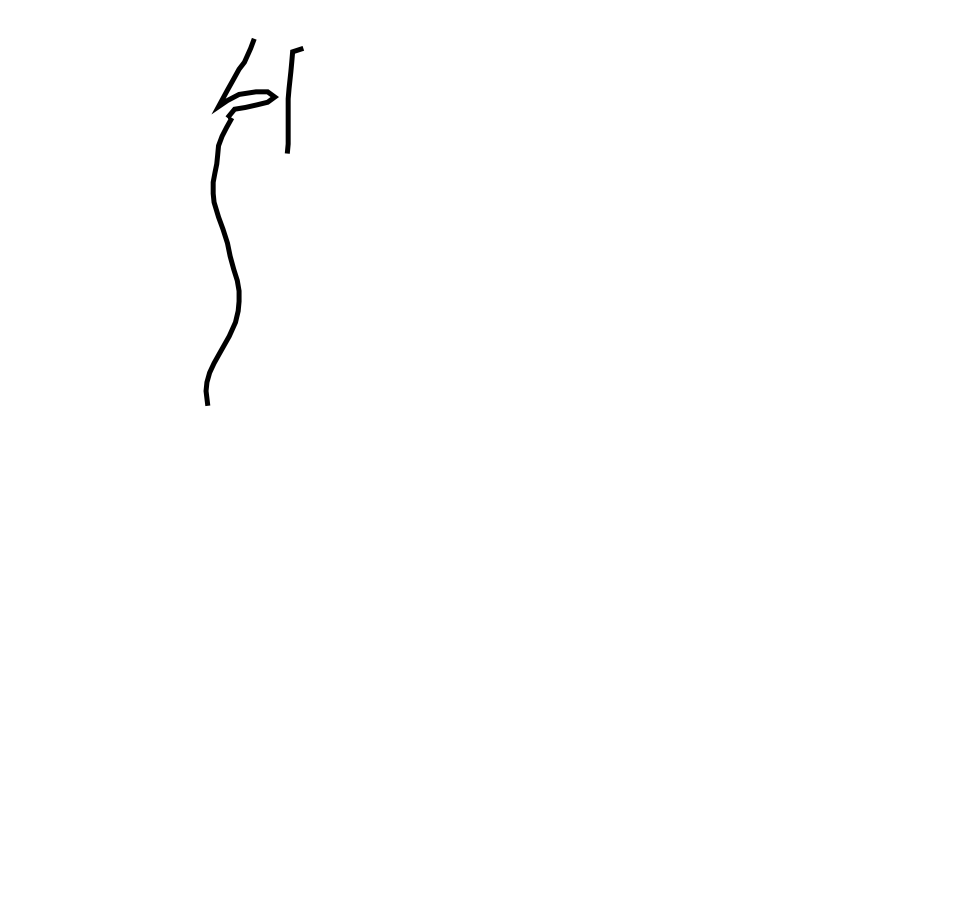

/Users/judithfan/kiddraw/analysis/museumdraw/python/cumulative_drawings/E1c_1510252568116/4_chair/4_chair_2.png


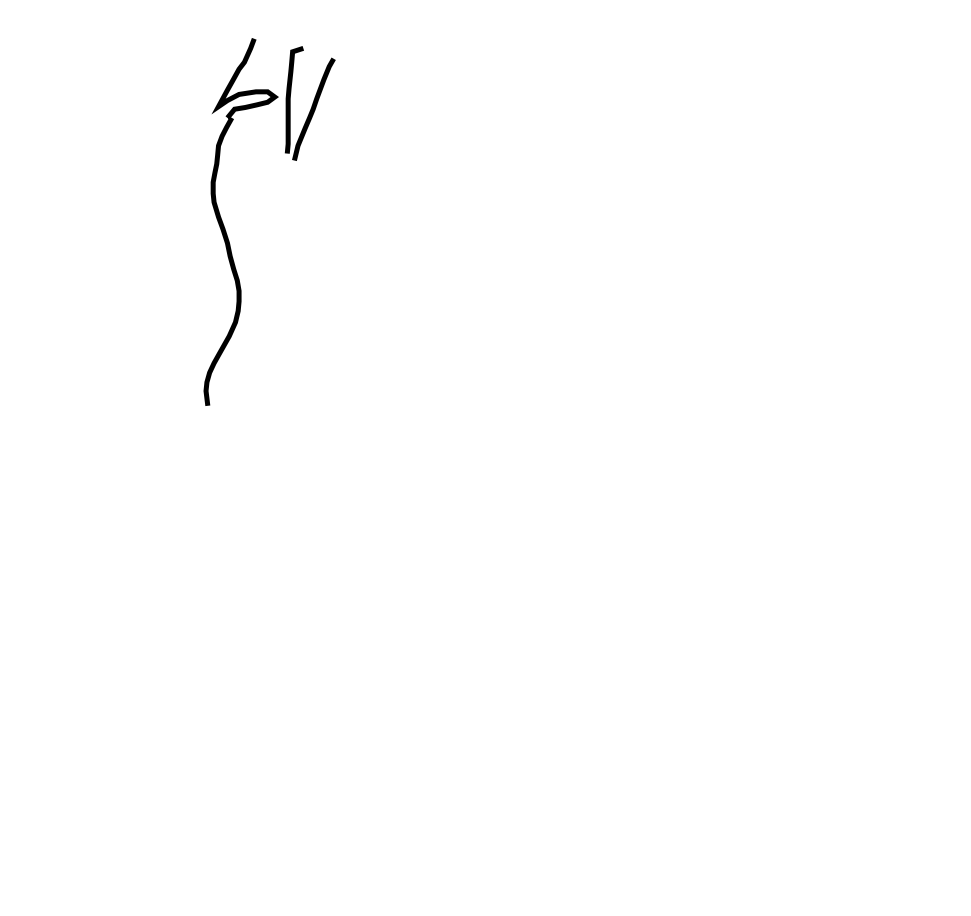

/Users/judithfan/kiddraw/analysis/museumdraw/python/cumulative_drawings/E1c_1510252568116/4_chair/4_chair_3.png


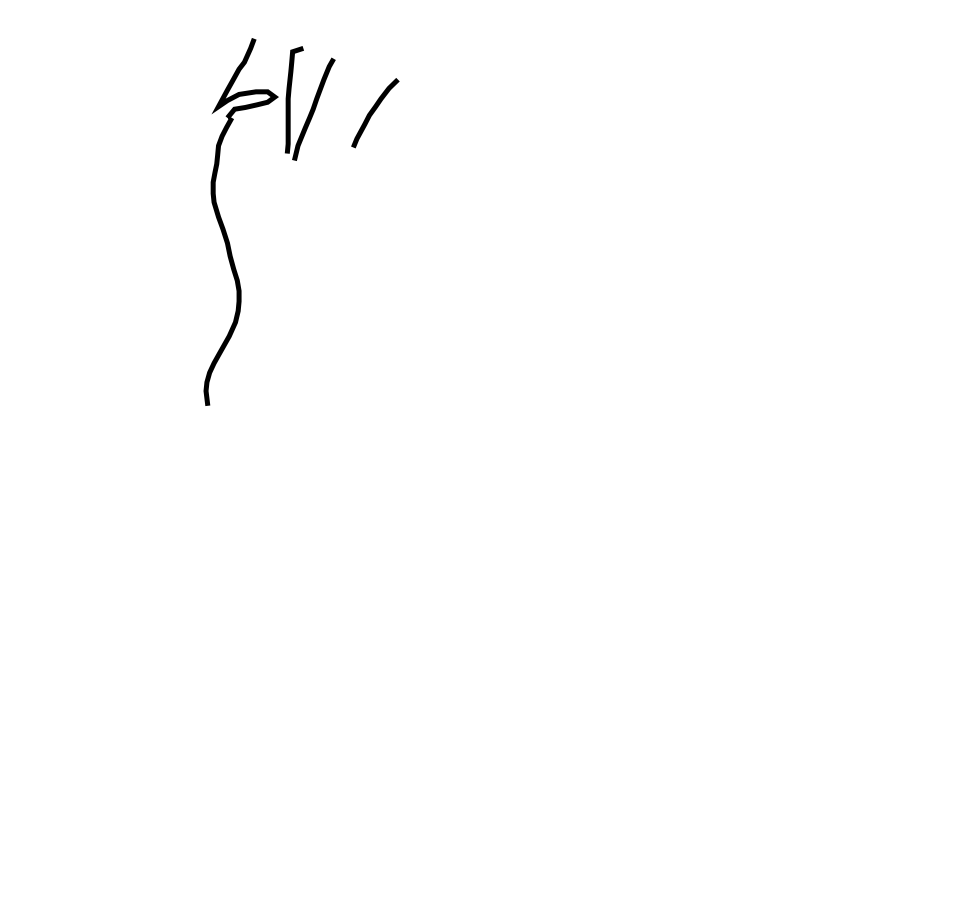

/Users/judithfan/kiddraw/analysis/museumdraw/python/cumulative_drawings/E1c_1510252568116/4_chair/4_chair_4.png


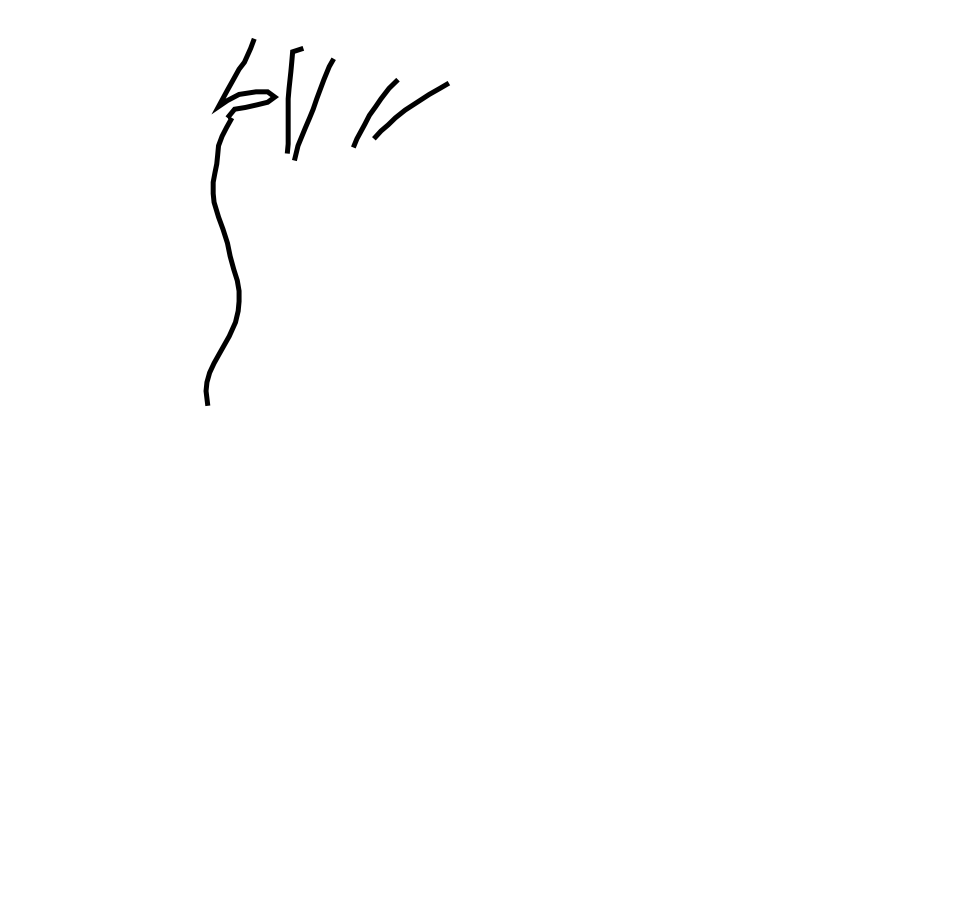

/Users/judithfan/kiddraw/analysis/museumdraw/python/cumulative_drawings/E1c_1510252568116/4_chair/4_chair_5.png


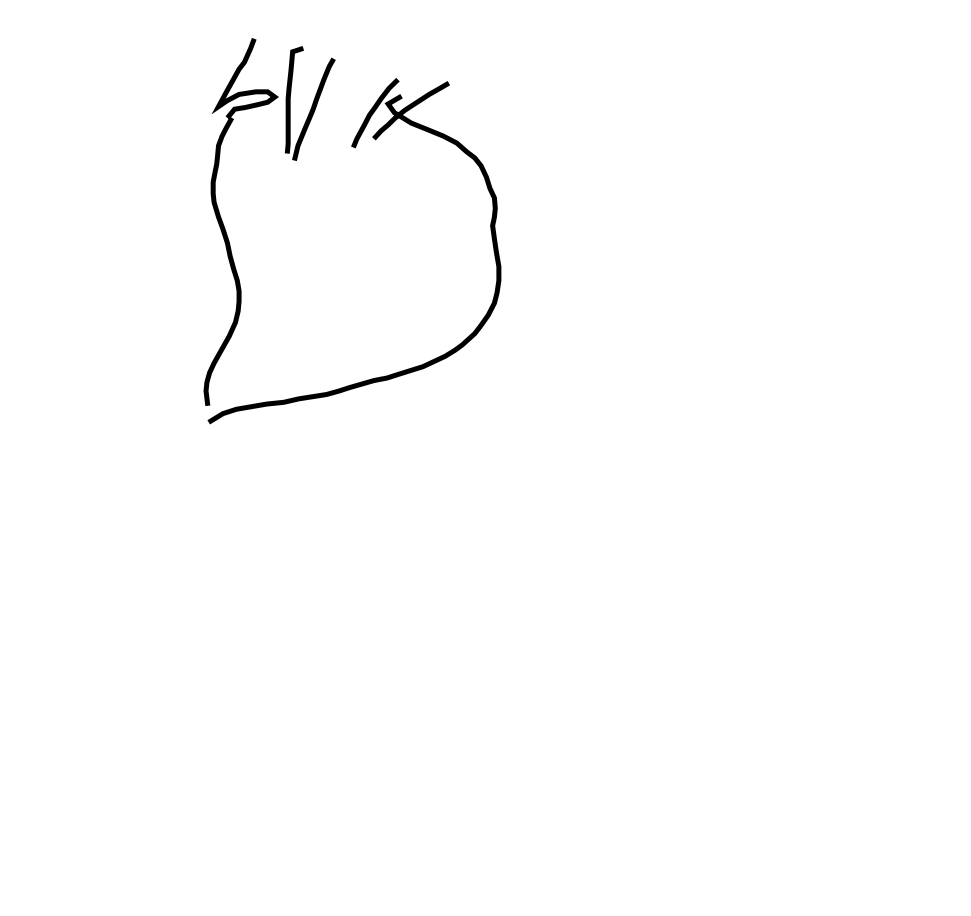

/Users/judithfan/kiddraw/analysis/museumdraw/python/cumulative_drawings/E1c_1510252568116/4_chair/4_chair_6.png


In [39]:
## how wide of strokes do we want?
line_width = 5

## how big of a picture do we want? (setting the size of the figure)
imsize = 16

## where do you want to save your cumulative drawings?
out_path = os.path.join(os.getcwd(),'cumulative_drawings',session_id,'{}_{}'.format(trial_num,category))
if not os.path.exists('./cumulative_drawings'):
    os.makedirs('./cumulative_drawings')
if not os.path.exists(os.path.join('cumulative_drawings',session_id)):
    os.makedirs(os.path.join('cumulative_drawings',session_id))
    
verts = Verts[0]
codes = Codes[0]
for i,verts in enumerate(Verts):
    codes = Codes[i]
    fig = plt.figure(figsize=(imsize,imsize))    
    ax = plt.subplot(111)
    ax.axis('off')
    ax.set_xlim(0,1000)
    ax.set_ylim(0,1000)
    ### render sketch so far
    if len(verts)>0:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor='none', lw=line_width)
        ax.add_patch(patch)
        plt.gca().invert_yaxis() # y values increase as you go down in image
        plt.show()
    else:        
        plt.show()  
        
    ## save out as png    
    if not os.path.exists(out_path):
        os.makedirs(out_path)
    fname = '{}_{}_{}.png'.format(trial_num,category,i)
    filepath = os.path.join(out_path,fname)
    print filepath
    fig.savefig(filepath,bbox_inches='tight')
    plt.close()    